<span style="color:green; font-size:22px;">

## Voice Gender Recognition

</span>



# About Dataset

## Voice Gender
**Gender Recognition by Voice and Speech Analysis**

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of **3,168** recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of **0Hz-280Hz** (human vocal range).


## Dataset Details

The CSV file (`voice.csv`) includes the following acoustic properties for each voice sample:

- `meanfreq`: Mean frequency (in kHz)
- `sd`: Standard deviation of frequency
- `median`: Median frequency (in kHz)
- `Q25`: First quantile (in kHz)
- `Q75`: Third quantile (in kHz)
- `IQR`: Interquartile range (in kHz)
- `skew`: Skewness
- `kurt`: Kurtosis
- `sp.ent`: Spectral entropy
- `sfm`: Spectral flatness
- `mode`: Mode frequency
- `centroid`: Frequency centroid
- `peakf`: Peak frequency (frequency with highest energy)
- `meanfun`: Average fundamental frequency measured across acoustic signal
- `minfun`: Minimum fundamental frequency measured across acoustic signal
- `maxfun`: Maximum fundamental frequency measured across acoustic signal
- `meandom`: Average dominant frequency measured across acoustic signal
- `mindom`: Minimum dominant frequency measured across acoustic signal
- `maxdom`: Maximum dominant frequency measured across acoustic signal
- `dfrange`: Range of dominant frequency measured across acoustic signal
- `modindx`: Modulation index
- `label`: Gender label (`male` or `female`)

## Download the Dataset

You can download the dataset from [Kaggle](https://www.kaggle.com/datasets/primaryobjects/voicegender/data).

Place the `voice.csv` file in the appropriate directory (`voicegender/voice.csv`).


### Objective

The objective of this model is to accurately classify the gender of speakers based on acoustic properties extracted from `voice samples`. Using machine learning techniques, particularly **classification algorithms**, the model aims to learn patterns in the dataset to distinguish between male and female voices. This task is essential for applications such as speech recognition systems, gender-specific marketing analysis, and voice-based user authentication.


# 1. Importing the Libraries

In [170]:
import numpy as np
import pandas as pd

import os
import opendatasets as od
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,f1_score,roc_curve, roc_auc_score, auc
from sklearn.metrics import confusion_matrix, classification_report

In [171]:
# Customization for Visualisation of Graphs
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14 
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# 2. Data Collection and Preprocessing

In [172]:
od.download('https://www.kaggle.com/datasets/primaryobjects/voicegender')

Skipping, found downloaded files in ".\voicegender" (use force=True to force download)


In [173]:
os.listdir('voicegender')

['voice.csv']

In [174]:
df = pd.read_csv('voicegender/voice.csv')
df.head(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [175]:
df.shape

(3168, 21)

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [177]:
# Check for null value
df.isna().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [178]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
meanfreq,3168.0,0.180907,0.029918,0.039363,0.163662,0.184838,0.199146,0.251124
sd,3168.0,0.057126,0.016652,0.018363,0.041954,0.059155,0.067020,0.115273
median,3168.0,0.185621,0.036360,0.010975,0.169593,0.190032,0.210618,0.261224
Q25,3168.0,0.140456,0.048680,0.000229,0.111087,0.140286,0.175939,0.247347
Q75,3168.0,0.224765,0.023639,0.042946,0.208747,0.225684,0.243660,0.273469
IQR,3168.0,0.084309,0.042783,0.014558,0.042560,0.094280,0.114175,0.252225
skew,3168.0,3.140168,4.240529,0.141735,1.649569,2.197101,2.931694,34.725453
kurt,3168.0,36.568461,134.928661,2.068455,5.669547,8.318463,13.648905,1309.612887
sp.ent,3168.0,0.895127,0.044980,0.738651,0.861811,0.901767,0.928713,0.981997
sfm,3168.0,0.408216,0.177521,0.036876,0.258041,0.396335,0.533676,0.842936


In [179]:
df['label'] = df['label'].map({"male":1, "female":0})
df.label

0       1
1       1
2       1
3       1
4       1
       ..
3163    0
3164    0
3165    0
3166    0
3167    0
Name: label, Length: 3168, dtype: int64

# 3. Data Visualization

Text(0.5, 1.0, 'Correlation Matrix')

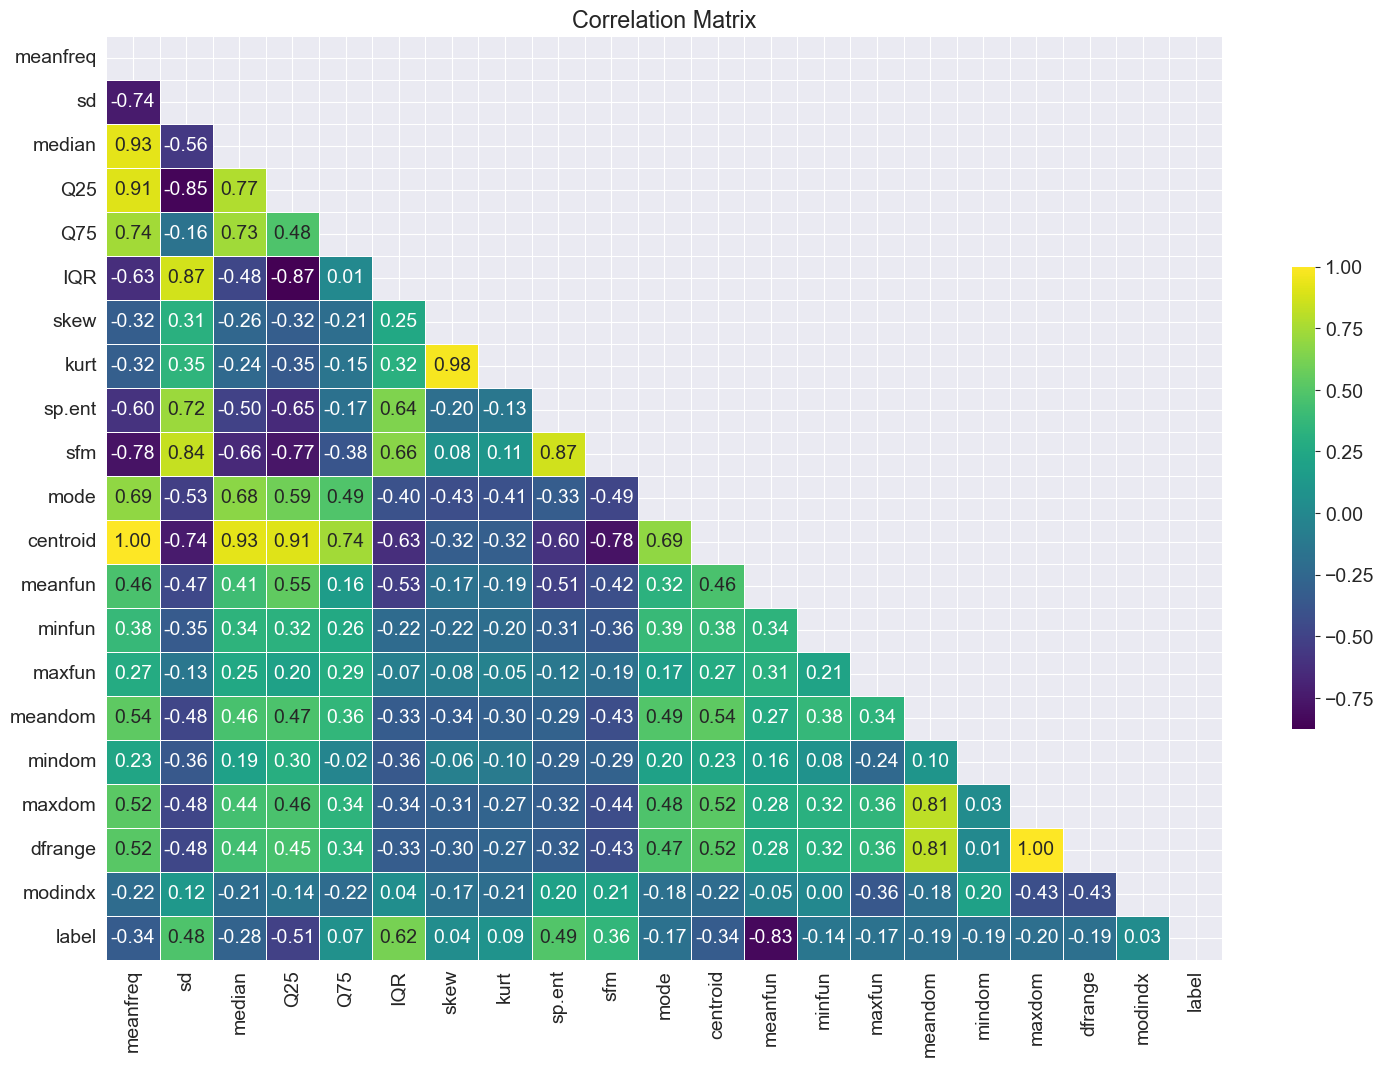

In [180]:
# Check for Correleation of each columns using Heatmap
corr_matrix = df.corr()
plt.figure(figsize=(18, 12))

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, 
            cmap='viridis',
            fmt=".2f",
            mask = mask,
            linewidths=0.6, 
            cbar_kws={"shrink":.5})
plt.title("Correlation Matrix")

Text(0.5, 1.0, 'Correlation Matrix')

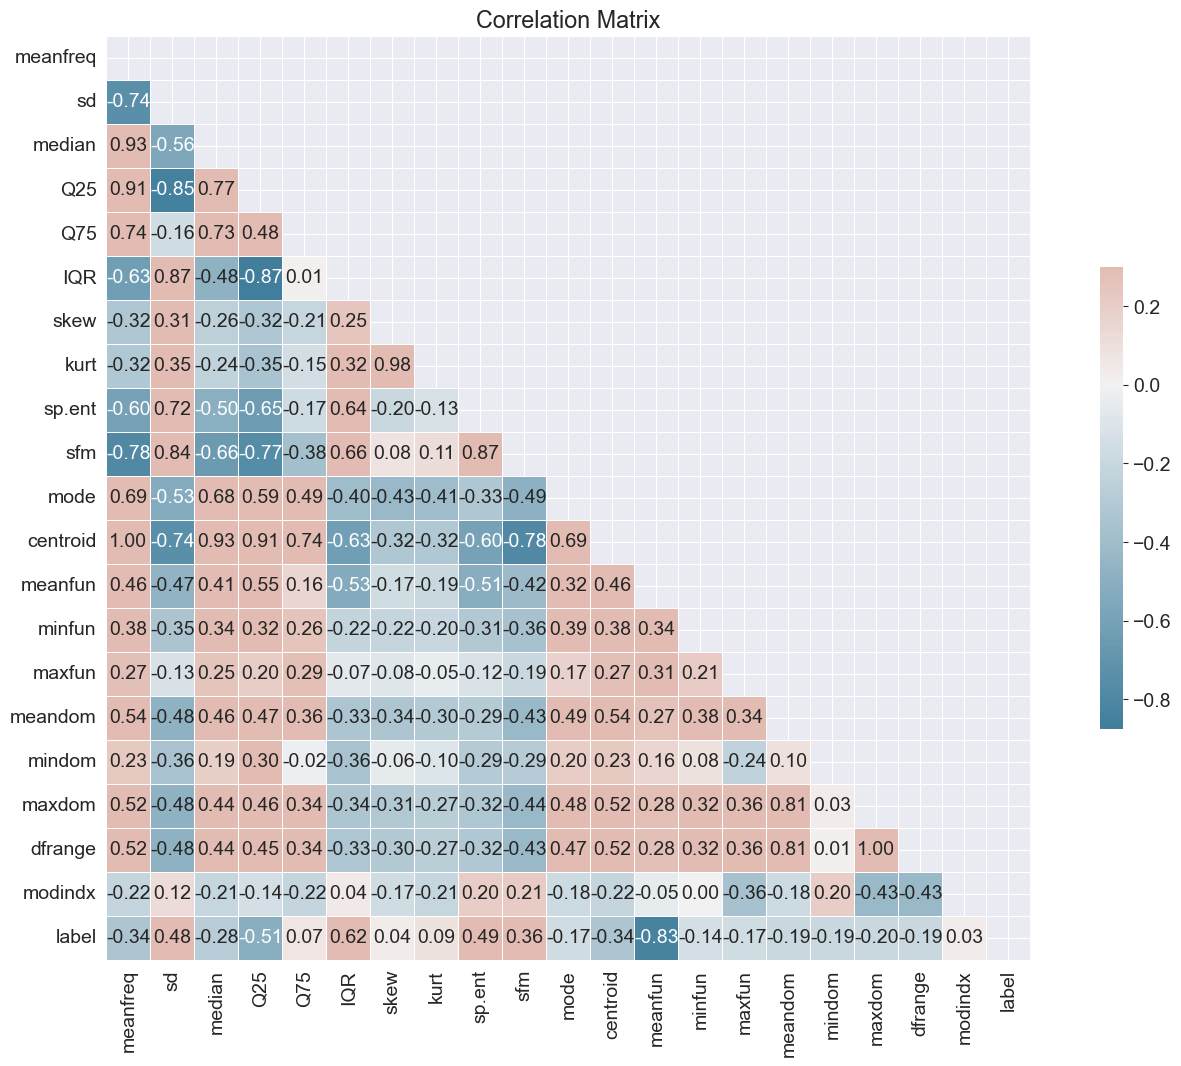

In [181]:
# Alternative customization to Check for Correleation of each columns using Heatmap
corr_matrix = df.corr()
plt.figure(figsize=(18, 12))

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_matrix, annot=True, cmap=cmap, vmax=.3,mask=mask, fmt=".2f",
           center=0, square=True, linewidths=0.5, cbar_kws={"shrink":.5})

plt.title("Correlation Matrix")

In [182]:
correlations = corr_matrix['label'].sort_values(ascending=False)
correlations

label       1.000000
IQR         0.618916
sp.ent      0.490552
sd          0.479539
sfm         0.357499
kurt        0.087195
Q75         0.066906
skew        0.036627
modindx     0.030801
minfun     -0.136692
maxfun     -0.166461
mode       -0.171775
meandom    -0.191067
dfrange    -0.192213
mindom     -0.194974
maxdom     -0.195657
median     -0.283919
centroid   -0.337415
meanfreq   -0.337415
Q25        -0.511455
meanfun    -0.833921
Name: label, dtype: float64

# 4. Data Splitting

In [183]:
# Input column is X and Target column is y
X = df.loc[:,df.columns != 'label']     
y = df.loc[:,'label']

In [184]:
# Scaling using Standard Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-4.04924806,  0.4273553 , -4.22490077, ..., -1.43142165,
        -1.41913712, -1.45477229],
       [-3.84105325,  0.6116695 , -3.99929342, ..., -1.41810716,
        -1.4058184 , -1.01410294],
       [-3.46306647,  1.60384791, -4.09585052, ..., -1.42920257,
        -1.41691733, -1.06534356],
       ...,
       [-1.29877326,  2.32272355, -0.05197279, ..., -0.5992661 ,
        -0.58671739,  0.17588664],
       [-1.2452018 ,  2.012196  , -0.01772849, ..., -0.41286326,
        -0.40025537,  1.14916112],
       [-0.51474626,  2.14765111, -0.07087873, ..., -1.27608595,
        -1.2637521 ,  1.47567886]])

In [185]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42) 

# 5. Modelling

In [186]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
     # Predict on training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate Accuracy score
    train_acc = accuracy_score(y_train, y_train_pred) * 100
    test_acc = accuracy_score(y_test, y_test_pred) * 100
    
    # Calculate f1 score
    train_f1 = f1_score(y_train, y_train_pred) * 100
    test_f1 = f1_score(y_test, y_test_pred) * 100
    
    # Calculate ROC AUC score
    train_roc_auc = roc_auc_score(y_train, y_train_pred) * 100
    test_roc_auc = roc_auc_score(y_test, y_test_pred) * 100
    
    # Print the scores
    print(f"Train Accuracy: {train_acc:.2f}%, Test Accuracy: {test_acc:.2f}%")
    print(f"Train F1 Score: {train_f1:.2f}%, Test F1 Score: {test_f1:.2f}%")
    print(f"Train ROC AUC Score: {train_roc_auc:.2f}%, Test ROC AUC Score: {test_roc_auc:.2f}%")
    
    # Return the evaluation metrics
    return train_acc, test_acc, train_f1, test_f1, train_roc_auc, test_roc_auc

# Initialise a list to store the results
results = []

# 6. Classifier Algorithms

# 6.1 Ridge Classifier

In [187]:
# Create an instance of Ridge Classifier with specified parameters
ridge_clf = RidgeClassifier(alpha=1.0, fit_intercept=True, copy_X=True, random_state=42)

# Print classifier name with specified parameters
print("Ridge Classifier (alpha=1.0):")

# Evaluate the model
train_acc, test_acc, train_f1, test_f1, train_roc_auc, test_roc_auc = evaluate_model(ridge_clf, X_train, y_train, X_test, y_test)

# Append results to the list
results.append(['Ridge Classifier', train_acc, test_acc, train_f1, test_f1, train_roc_auc, test_roc_auc])


Ridge Classifier (alpha=1.0):
Train Accuracy: 96.88%, Test Accuracy: 97.48%
Train F1 Score: 96.87%, Test F1 Score: 97.62%
Train ROC AUC Score: 96.90%, Test ROC AUC Score: 97.49%


# 6.2 Decision Tree Classifier

In [188]:
# Create an instance of Decision Tree Classifier with specified parameters
dt_clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1,
                                max_features=None, random_state=42)

# Print classifier name with specified parameters
print("Decision Tree Classifier (criterion='gini'):")

# Evaluate the model
train_acc, test_acc, train_f1, test_f1, train_roc_auc, test_roc_auc = evaluate_model(dt_clf, X_train, y_train, X_test, y_test)

# Append results to the list
results.append(['Decision Tree Classifier', train_acc, test_acc, train_f1, test_f1, train_roc_auc, test_roc_auc])


Decision Tree Classifier (criterion='gini'):
Train Accuracy: 100.00%, Test Accuracy: 96.69%
Train F1 Score: 100.00%, Test F1 Score: 96.83%
Train ROC AUC Score: 100.00%, Test ROC AUC Score: 96.78%


# 6.3 Random Forest Classifier

In [189]:
# Create an instance of Random Forest Classifier with corrected parameters
rf_clf = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=11, min_samples_split=2, 
                                min_samples_leaf=1, max_features='sqrt', bootstrap=True, random_state=42)

# Print classifier name with corrected parameters
print("Random Forest Classifier (n_estimators=200, criterion='gini', max_features='sqrt'):")

# Evaluate the model
train_acc, test_acc, train_f1, test_f1, train_roc_auc, test_roc_auc = evaluate_model(rf_clf, X_train, y_train, X_test, y_test)

# Append results to the list
results.append(['Random Forest Classifier', train_acc, test_acc, train_f1, test_f1, train_roc_auc, test_roc_auc])


Random Forest Classifier (n_estimators=200, criterion='gini', max_features='sqrt'):
Train Accuracy: 100.00%, Test Accuracy: 98.58%
Train F1 Score: 100.00%, Test F1 Score: 98.65%
Train ROC AUC Score: 100.00%, Test ROC AUC Score: 98.62%


# 6.4 KNeighbour Classifier

In [190]:
# Create an instance of KNN Classifier with specified parameters
knn_clf = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto', leaf_size=30, p=2, metric='minkowski')

# Print classifier name with specified parameters
print("KNN Classifier (n_neighbors=5):")

# Evaluate the model
train_acc, test_acc, train_f1, test_f1, train_roc_auc, test_roc_auc = evaluate_model(knn_clf, X_train, y_train, X_test, y_test)

# Append results to the list
results.append(['KNN Classifier', train_acc, test_acc, train_f1, test_f1, train_roc_auc, test_roc_auc])


KNN Classifier (n_neighbors=5):
Train Accuracy: 100.00%, Test Accuracy: 97.95%
Train F1 Score: 100.00%, Test F1 Score: 98.07%
Train ROC AUC Score: 100.00%, Test ROC AUC Score: 97.95%


# 6.5 Support Vector Classifier (SVC)

In [191]:
# Create an instance of Support Vector Classifier
svc_clf = SVC(kernel='rbf', C=1.0, probability=True, random_state=42)

# Print classifier name
print("Support Vector Classifier (SVC) :")

# Evaluate the model
train_acc, test_acc, train_f1, test_f1, train_roc_auc, test_roc_auc = evaluate_model(svc_clf, X_train, y_train, X_test, y_test)

# Append results to the list
results.append(['Support Vector Classifier', train_acc, test_acc, train_f1, test_f1, train_roc_auc, test_roc_auc])


Support Vector Classifier (SVC) :
Train Accuracy: 98.58%, Test Accuracy: 98.26%
Train F1 Score: 98.55%, Test F1 Score: 98.36%
Train ROC AUC Score: 98.57%, Test ROC AUC Score: 98.29%


# 6.6 XGB Classifier

In [192]:
# Create an instance of XGB Classifier with specified parameters
xgb_clf = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=11, min_child_weight=2, gamma=0,
                        subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', nthread=4, scale_pos_weight=1, random_state=42)

# Print classifier name with specified parameters
print("XGB Classifier (learning_rate=0.1, n_estimators=100, max_depth=11, min_child_weight=2, gamma=0):")

# Evaluate the model
train_acc, test_acc, train_f1, test_f1, train_roc_auc, test_roc_auc = evaluate_model(xgb_clf, X_train, y_train, X_test, y_test)

# Append results to the list
results.append(['XGB Classifier', train_acc, test_acc, train_f1, test_f1, train_roc_auc, test_roc_auc])


XGB Classifier (learning_rate=0.1, n_estimators=100, max_depth=11, min_child_weight=2, gamma=0):
Train Accuracy: 99.92%, Test Accuracy: 98.11%
Train F1 Score: 99.92%, Test F1 Score: 98.20%
Train ROC AUC Score: 99.92%, Test ROC AUC Score: 98.16%


#  7. Comparison of Models

**Random Forest achieved high accuracy, with having a highest test accuracy of approximately 98.58%.**

In [193]:
# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=['Classifier', 'Train Accuracy', 'Test Accuracy', 'Train F1 Score', 'Test F1 Score', 'Train ROC AUC Score', 'Test ROC AUC Score'])
results_df

,Classifier,Train Accuracy,Test Accuracy,Train F1 Score,Test F1 Score,Train ROC AUC Score,Test ROC AUC Score
0,Ridge Classifier,96.882399,97.476341,96.871287,97.619048,96.900938,97.486237
1,Decision Tree Classifier,100.000000,96.687697,100.000000,96.832579,100.000000,96.784362
2,Random Forest Classifier,100.000000,98.580442,100.000000,98.654709,100.000000,98.624724
3,KNN Classifier,100.000000,97.949527,100.000000,98.068351,100.000000,97.951323
4,Support Vector Classifier,98.579321,98.264984,98.548387,98.360656,98.570244,98.288024
5,XGB Classifier,99.921073,98.107256,99.919743,98.203593,99.919808,98.159638


# 8. Feature Importance

In [194]:
# Get feature importances
importance_df = pd.DataFrame({
    'feature': X.columns, # feature names
    'importance': rf_clf.feature_importances_ # feature importances
}).sort_values('importance', ascending=False) # Sort feature importances in descending order


In [195]:
importance_df.head(10)

,feature,importance
12,meanfun,0.354320
5,IQR,0.219043
3,Q25,0.136308
1,sd,0.072115
8,sp.ent,0.037512
9,sfm,0.028515
11,centroid,0.019886
0,meanfreq,0.019086
10,mode,0.016279
2,median,0.013799


<Axes: title={'center': 'Feature Importance'}, xlabel='importance', ylabel='feature'>

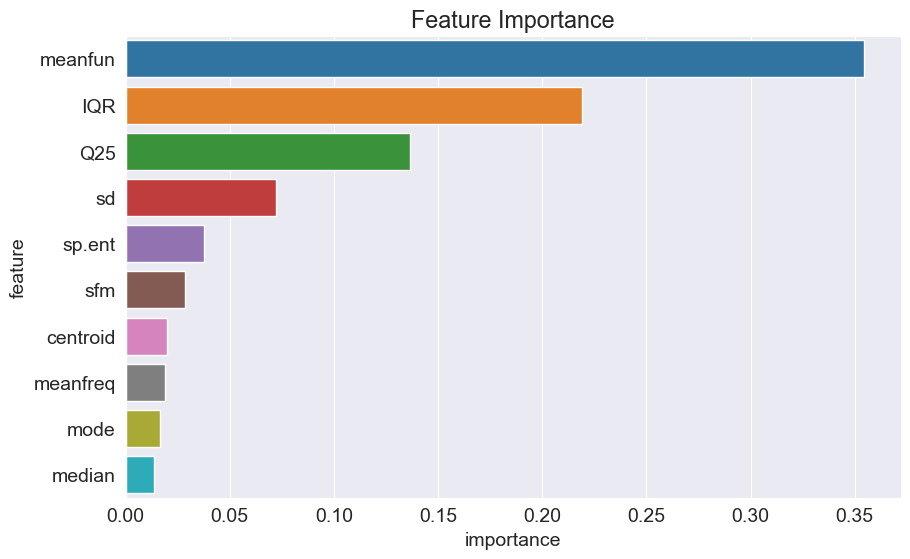

In [196]:
# Plot feature importance graph for head(10)
plt.figure(figsize=(10,6))
plt.title("Feature Importance")
sns.barplot(importance_df.head(10), y='feature', x='importance') 

# 9. Actual vs Predicted

Random Forest Classifier achieved the highest test accuracy of **98.58%**. To delve deeper into their predictive capabilities, we examine their actual versus predicted outcomes on the test dataset.

###   For Random Forest Classifier

In [203]:
y_test_pred  = rf_clf.predict(X_test)

pred_df= pd.DataFrame({'Actual': np.round(y_test, 0), 
                   'Predicted': np.round(y_test_pred, 0)})

# Reverse the label mapping
pred_df['Actual'] = pred_df['Actual'].map({1: "male", 0: "female"})
pred_df['Predicted'] = pred_df['Predicted'].map({1: "male", 0: "female"})

# Display the reversed DataFrame
pred_df

,Actual,Predicted
2148,female,female
1124,male,male
170,male,male
3158,female,female
2229,female,female
...,...,...
3007,female,female
912,male,male
533,male,male
857,male,male


In [204]:
pred_df[pred_df.Actual == pred_df.Predicted]

,Actual,Predicted
2148,female,female
1124,male,male
170,male,male
3158,female,female
2229,female,female
...,...,...
3007,female,female
912,male,male
533,male,male
857,male,male


In [205]:
pred_df[pred_df.Actual != pred_df.Predicted]

,Actual,Predicted
532,male,female
2924,female,male
256,male,female
642,male,female
507,male,female
3001,female,male
67,male,female
73,male,female
535,male,female


In [206]:
pred_df.to_csv('voice-result.csv', index=None)

In [207]:
from IPython.display import FileLink
FileLink('voice-result.csv')

C:\Users\HP\voice-result.csv

# 10. Model Comparison Table

| Classifier                  | Train Accuracy | Test Accuracy | Train F1 Score | Test F1 Score | Train ROC AUC Score | Test ROC AUC Score |
|-----------------------------|----------------|---------------|----------------|---------------|---------------------|--------------------|
| Ridge Classifier            | 96.882399      | 97.476341     | 96.871287      | 97.619048     | 96.900938           | 97.486237          |
| Decision Tree Classifier    | 100.000000     | 96.687697     | 100.000000     | 96.832579     | 100.000000          | 96.784362          |
| Random Forest Classifier    | 100.000000     | 98.580442     | 100.000000     | 98.654709     | 100.000000          | 98.624724          |
| KNN Classifier              | 100.000000     | 97.949527     | 100.000000     | 98.068351     | 100.000000          | 97.951323          |
| Support Vector Classifier   | 98.579321      | 98.264984     | 98.548387      | 98.360656     | 98.570244           | 98.288024          |
| XGB Classifier              | 99.921073      | 98.107256     | 99.919743      | 98.203593     | 99.919808           | 98.159638          |


# Analysis

- **Accuracy**: Random Forest Classifier achieved the highest test accuracy of **98.58%**, closely followed by Support Vector Classifier (**98.26%**) and XGB Classifier (**98.11%**). Decision Tree Classifier, despite perfect training accuracy (100%), has a lower test accuracy (**96.69%**), indicating potential overfitting.

- **F1 Score**: Random Forest Classifier also led in F1 scores on the test set with **98.65%**, followed by Support Vector Classifier (**98.36%**) and XGB Classifier (**98.20%**). These metrics indicate good balance between precision and recall.

- **ROC AUC Score**: Random Forest Classifier and Support Vector Classifier both achieved high ROC AUC scores on the test set (**98.62%** and **98.29%** respectively), indicating excellent discrimination ability.


# Conclusion and Recommendations

Based on the performance metrics:

1. **Random Forest Classifier** emerges as the top performer across all evaluated metrics (accuracy, F1 score, ROC AUC score), indicating robust performance and good generalization ability. It consistently achieved high scores on both training and test sets.

2. **Support Vector Classifier** and **XGB Classifier** also demonstrated strong performance, especially in terms of accuracy and ROC AUC score. They are suitable alternatives if computational efficiency or interpretability is a concern compared to Random Forest.

3. **Decision Tree Classifier**, while achieving perfect training accuracy, shows signs of overfitting as indicated by its lower test accuracy and F1 score. Further regularization or ensemble methods could potentially improve its performance.

4. **Ridge Classifier** and **KNN Classifier** performed well but slightly below the top performers in terms of accuracy and F1 score metrics.
